In [1]:
#Given parameters
F6P = 0.1 #mM concentration and constant
ATP = 2.3 #mM conc and constant
PFK = 0.12 #uM conc and const; enzyme concentration
#PFK = PFKu/1000 #mM conc and const; enzyme concentration
KF6P = 0.11 #mM
KATP = 0.42 #mM
kcat = 0.4*3600 #1/hr





In [2]:
#Kinetic rate limit of PFK
r11 = kcat*PFK #r1 part 1 #units of uM/hr
r12 = (F6P/(KF6P+F6P)) #r1 part 2 #unitless
r13 = (ATP/(KATP + ATP)) #r1 part 3 #unitless
r1 = r11*r12*r13 #Kinetic limit of PFK
r1 #uM/hr

69.5798319327731

In [3]:
#Data 3-5-AMP
AMPcon = [0.000, 0.055, 0.093, 0.181, 0.405, 0.990] #3-5-AMP concentration mM
Overallrate = [3.003, 6.302, 29.761, 52.002, 60.306, 68.653] #uM/hr
conest = [0.59, 1.20, 5.7, 10.2, 11.8, 13.3] #95% confidence estimate of measured rate


In [4]:
#Calculate W1
W1 = (Overallrate[0]/r1)/(1-(Overallrate[0]/r1)) #no 3-5-AMP so fi = 0
W1 #dimensionless


0.04510578098748108

In [5]:
#Calculate W2
a =(Overallrate[5]/r1)
W2 = (a+W1*(a-1))/(1-a) #with 3-5-AMP so assume saturated at highest conc
W2

74.02765495632235

In [6]:
#Estimate paramters for hill-type binding function
Ki = 0.3 #needed to be less than 1
n = 6 #needed to be higher to get closer to 1 when put into fi
#x = AMPcon[5]/AMPcon[5]
#fi = ((x/Ki)**n)/((1+(x/Ki)**n))
#fi

In [7]:
#get values of x for all concentrations assuming saturated at data point 6
x = []
for t in AMPcon:
    c = t/AMPcon[5] #divide each data point by highest to get fraction of bound activator
    x.append(c)
print(x)

[0.0, 0.05555555555555556, 0.09393939393939393, 0.1828282828282828, 0.4090909090909091, 1.0]


In [8]:
#Calculate fi (hill type binding function) for all data points and store in a list
filist = []
for i in x:
    fi = ((i/Ki)**n)/((1+(i/Ki)**n)) #plug everything into fi
    filist.append(fi)
print(filist)

[0.0, 4.032922960816195e-05, 0.000941780713819529, 0.04873428489269943, 0.8654052601900627, 0.9992715310538617]


In [9]:
#Calculate control correction functions for all fi
vlist = []
for j in filist:
    v = (W1 + W2*j)/(1+W1 + W2*j) #calculate the u variable equation now, called it v on the exam
    vlist.append(v)
print(vlist)

[0.0431590579710145, 0.045884610577263424, 0.10299710092881179, 0.7850752195094296, 0.9846411467948317, 0.9866700140730964]


In [10]:
#Calculate estimated overall rate
rjlist = []
for a in vlist:
    rj = r1*a
    rjlist.append(rj) #calculate the estimated overall rate to create a model to compare to measured data points
print(rjlist)

[3.003, 3.192643492266732, 7.166520972189592, 54.62540182805106, 68.51116550807735, 68.65233375231293]


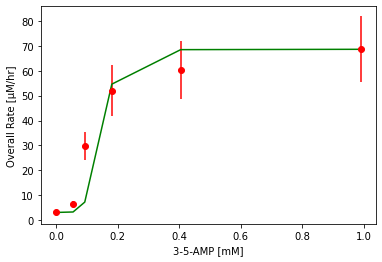

In [11]:
#make graph to display data and data points
import matplotlib.pyplot as plt
# concentration of 3-5-AMP
xest = AMPcon
# estimation of overall rate of 3-5-AMP
yest = rjlist
  
# plotting the estimation/model
plt.plot(xest, yest, color = "green")

#concentration of 3-5-AMP
xmeas = AMPcon
#measured overall rate of 3-5-AMP
ymeas = Overallrate

plt.plot(xmeas,ymeas, marker = "o", linestyle = "", markerfacecolor = "red", markeredgecolor = "red")

#add in error bars for the measured data
plt.errorbar(xmeas, ymeas, conest, linestyle = "", color = "red")
  
# naming the x axis
plt.xlabel('3-5-AMP [mM]')
# naming the y axis
plt.ylabel('Overall Rate [\u03BCM/hr]')
plt.show()


#want data line to be smoother but this is based on being a 3rd polynomial so doesn't work
#from scipy.interpolate import make_interp_spline, BSpline
#import numpy as np

#x4 = np.array(xest)
#y4 = np.array(yest)

#x_new = np.linspace(x4.min(), y4.max(), 400)
#a_BSpline = make_interp_spline(x4, y4)
#y_new = a_BSpline(x_new)

#plt.plot(x_new, y_new)

#plt.show()